In [527]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [528]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  14:17    <DIR>          .
28/09/2024  22:20    <DIR>          ..
24/09/2024  20:19         5,736,098 best_model.pth
24/09/2024  20:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  11:46           132,935 training.ipynb
24/09/2024  20:19            24,818 training_best_history.png
24/09/2024  19:59           204,856 training_byol big embedding.ipynb
14/10/2024  13:11           247,018 training_byol.ipynb
19/09/2024  17:50           248,587 training_norms_visual.ipynb
01/10/2024  08:38           441,652 training-visual.ipynb
21/10/2024  15:25            52,208 transforms_debugging.ipynb
               9 File(s)      7,088,959 bytes
               2 Dir(s)  85,914,058,752 bytes free


In [529]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph

In [530]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)
QuantumCircuitGraph.set_node_order(None)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

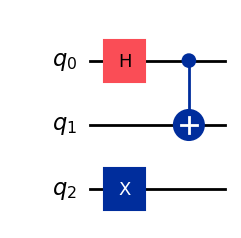

In [531]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [532]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [533]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


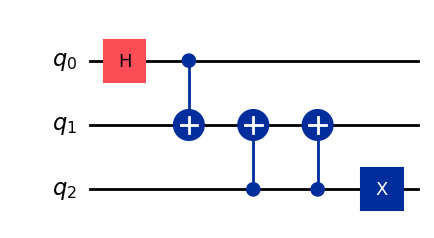

In [534]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [535]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Matching subgraphs: [{'cx_2_control_2': 'cx_0_control_0', 'cx_1_target_2': 'cx_1_target_0', 'cx_2_control_3': 'cx_0_control_1', 'cx_1_target_3': 'cx_1_target_1'}]
Matching subgraph selected: {'cx_2_control_2': 'cx_0_control_0', 'cx_1_target_2': 'cx_1_target_0', 'cx_2_control_3': 'cx_0_control_1', 'cx_1_target_3': 'cx_1_target_1'}
Current operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 1)), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 1)), ()), (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 2),), ())]
Graph nodes:


Transformed Circuit:


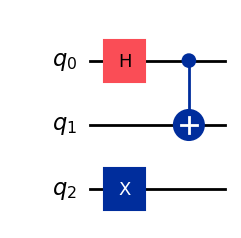

In [536]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


Original Circuit:


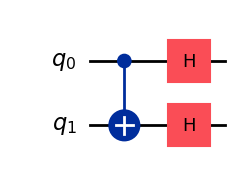

In [553]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [554]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [555]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0', 'h_0_1', 'h_1_2']



Transformed Circuit:


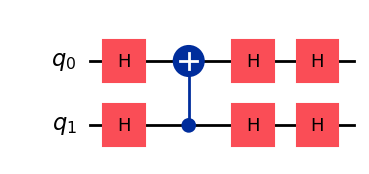

In [556]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

In [557]:
# Apply the transformation again, so that the reverse transformation is applied
reverse_transformation = SwapControlTargetTransformation(transformed_qcg)
transformed_qcg = reverse_transformation.apply()  
transformed_circuit = transformed_qcg.quantum_circuit

Matching subgraphs: [{'h_1_0': 'h_0_0', 'cx_1_control_2': 'cx_0_control_2', 'cx_0_target_2': 'cx_1_target_2', 'h_1_3': 'h_0_3', 'h_0_4': 'h_1_4', 'h_0_1': 'h_1_1'}]
Matching subgraph selected: {'h_1_0': 'h_0_0', 'cx_1_control_2': 'cx_0_control_2', 'cx_0_target_2': 'cx_1_target_2', 'h_1_3': 'h_0_3', 'h_0_4': 'h_1_4', 'h_0_1': 'h_1_1'}
Graph nodes: ['h_1_0', 'h_0_1', 'cx_1_control_2', 'cx_0_target_2', 'h_1_3', 'h_0_4', 'h_0_5', 'h_1_6']



Transformed Circuit:


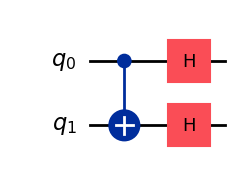

In [558]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')